# Data Structures and Algorithms - Assignment 1

### Adam McCarthy

### 20204693

# 1. Write an algorithm to compute the factorial of a positive integer *n*.

The mathematical formula for calculating the factorial of a positive integer *n* is.

> *n! = n x (n-1) x (n=2) x ... x 1*

There are three primary methods of producing this algorithm in Python:
 - Tail Recursive = call itself with reducing input value and carry iterator with it.
 - Non-Tail Recursive = call itself with reducing input value and work back through stack afterwards.
 - Iterative = standard loop to iterate through values.

## The following is the pseudo-code for each algorithm (computing the factorial of a positive integer *n*):

 ### Tail Recursive
>function(n, result = 1):
>
>   - If input is 1:
>
>        return result      (base case)
>
>   - else:
>   
>        return function(input - 1, result * input)      (recursive case)

 ### Non-Tail Recursive
>function(n):
>
>   - If input is 1:
>
>        return result      (base case)
>
>   - else:
>   
>        return n * function(input - 1)      (recursive case)

 ### Iterative
>function(n):
>
>   result = 1
>
>   - for loop from 1 to n - 1:
>
>        Multiply result by iterator
>
>   - return result

# 2. For different values of *n*, implement your algorithm using two approaches: iterative and recursive (tail and non-tail recursions). For each case, plot running time as a function of *n* and compare the achieved results.

Import modules necessary for this Assignment

In [5]:
import numpy as np
import timeit
from functools import partial
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline
import random

The following algorithm used tail recursion in order to find the factorial of positive integer *n*. It calls itself until it reaches its base case, carrying its result recursively with an iterator.

In [6]:
def factorialTailRecursion(n, result = 1):
    if n == 1:
        return result
    else:
        return factorialTailRecursion(n - 1, result*n)

The following algorithm uses non-tail recursion to find the factorial of positive integer *n*. It calls itself until it reaches its base case. However, it then must work backwords through the stack to multiply the input by itself.

In [7]:
def factorialNonTailRecursion(n):
    if n == 1:
        return 1
    else:
        return n * factorialNonTailRecursion(n - 1)

The following algorithm takes an iterative approach to solving for the factorial of positive integer *n*. It loops through integers until it reaches *n*, multiplying each integer by its previous result along the way.

In [8]:
def factorialIterative(n):
    result = 1
    for i in range(1,n+1):
        result *= i
    return result

This next function creates a line plot for each aforementioned solution. It uses the median time to solve of a solution for *n* (in the following example, 100 tries were executed per value of *n*). It then plots these running times to evaluate its time complexity. While all three algorithms appear to have a slight curve, they are in fact linear in their time complexity, as the amount of loops/function calls is directly proportional to the value of *n* - i.e. *n + 1 values* = *n + 1 function calls*.

From analysing the graph, the iterative approach appears to be the fastest algorithm, with the shallowest slope. Non-tail recursion seems to be the next quickest, with tail recursion as the slowest algorithm for this given problem.

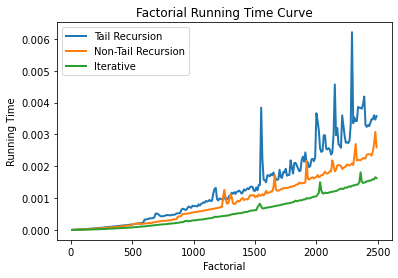

In [9]:
def plotLineFactorial(fn, fnName, start, stop, step, tests):
    times=[]
    values=[]
    for x in range(start, stop, step):
        timesAverage = []
        for y in range(tests):
            start_time = time.clock()
            fn(x)
            time_elapsed = time.clock() - start_time
            timesAverage.append(time_elapsed)
        timesAverage = sorted(timesAverage)
        times.append(timesAverage[tests//2])
        values.append(x)
    plt.plot(values, times, lw=2, label=fnName)
    plt.legend()


plotLineFactorial(factorialTailRecursion, 'Tail Recursion', 10, 2500, 10, 100)
plotLineFactorial(factorialNonTailRecursion, 'Non-Tail Recursion', 10, 2500, 10, 100)
plotLineFactorial(factorialIterative, 'Iterative', 10, 2500, 10, 100)

plt.title("Factorial Running Time Curve")
plt.xlabel("Factorial")
plt.ylabel("Running Time")
plt.show()

The following function has the same function as above, except it smooths the line plot in order to more easily see trends.

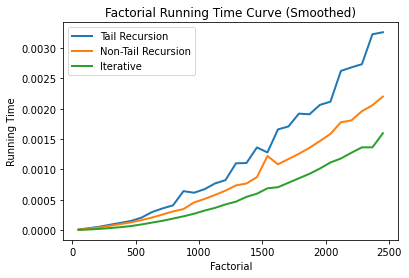

In [10]:
def plotSmoothFactorial(fn, fnName, start, stop, step, tests):
    times=[]
    values=[]
    for x in range(start, stop, step):
        timesAverage = []
        for y in range(tests):
            start_time = time.clock()
            fn(x)
            time_elapsed = time.clock() - start_time
            timesAverage.append(time_elapsed)
        timesAverage = sorted(timesAverage)
        times.append(timesAverage[tests//2])
        values.append(x)
    model=make_interp_spline(values,times)
    xs=np.linspace(50,stop-50,30)
    ys=model(xs)
    plt.plot(xs, ys, lw=2, label=fnName)
    plt.legend()


plotSmoothFactorial(factorialTailRecursion, 'Tail Recursion', 10, 2500, 10, 100)
plotSmoothFactorial(factorialNonTailRecursion, 'Non-Tail Recursion', 10, 2500, 10, 100)
plotSmoothFactorial(factorialIterative, 'Iterative', 10, 2500, 10, 100)

plt.title("Factorial Running Time Curve (Smoothed)")
plt.xlabel("Factorial")
plt.ylabel("Running Time")
plt.show()

The following function uses an alternative solution for timing the algorithm's time complexity, and also uses a scatter plot to more easily visualise individual results.

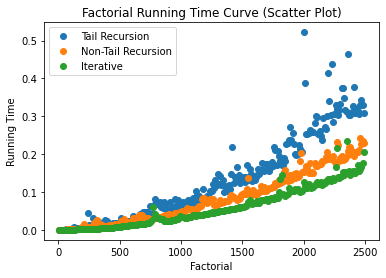

In [11]:
def plotScatterFactorial(fn, fnName, start, stop, step, reps):
    x = []
    y = []
    for i in range(start, stop, step):
        functionTimer = timeit.Timer(partial(fn, i))
        times = functionTimer.timeit(number=reps)
        x.append(i)
        y.append(times)
    plt.plot(x, y, 'o', label=fnName)
    plt.legend()

plotScatterFactorial(factorialTailRecursion, 'Tail Recursion', 10, 2500, 10, 100)
plotScatterFactorial(factorialNonTailRecursion, 'Non-Tail Recursion', 10, 2500, 10, 100)
plotScatterFactorial(factorialIterative, 'Iterative', 10, 2500, 10, 100)

plt.title("Factorial Running Time Curve (Scatter Plot)")
plt.xlabel("Factorial")
plt.ylabel("Running Time")
plt.show()

# 3. Use one of the sequences obtained from task 2 as an input for search algorithms. Implement two methods from: linear search, iterative binary, and recursive binary.

This function uses linear search on an array in order to find a given element. It loops through the array from start to finish until it finds a match.

In [12]:
def linearSearch(array, ans):
    for i in range(len(array)):
        if array[i] == ans:
            return i
    return -1

This function uses recursion to conduct a binary search on an array. It begins its search by checking the middle element of the array. If that element is not the correct answer, splits its search into two. It evaluates whether the element it needs to find is lower/higher than the mid-point of the array, and ignores the opposite half of the search (where the element is not present). This cycle repeats, halving the search each time until it discovers the correct element or exhausts its search by only having one element remaining.

What differentiates recursive binary from iterative binary is that it re-calls itself with new parameters for its low/high search points, whereas the iterative binary search algorithm loops until its main condition (low <= high) is no longer true.

In [13]:
def recursiveBinarySearch(array, ans, low = 0 , high = 0):
    if high == 0:
        high = (len(array) - 1)

    if high >= low:
        middle = (high + low) // 2

        if array[middle] == ans:
            return middle
        
        elif array[middle] > ans:
            return recursiveBinarySearch(array, ans, low, (middle - 1))
        
        else:
            return recursiveBinarySearch(array, ans, (middle + 1), high)

    else:
        return -1

In [14]:
def iterativeBinarySearch(array, ans, low = 0 , high = 0):
    if high == 0:
        high = (len(array) - 1)
    
    while low <= high:
        middle = (high + low) // 2

        if array[middle] < ans:
            low = middle + 1
        
        elif array[middle] > ans:
            high = middle - 1

        else:
            return middle
    else:
        return -1

This creates lists of factorials for positive integers *n* up to 1,000, and 2,000 respectively. The second array is created in order to view what happens when the algorithm tries to search for elements that are outside of its given list.

In [15]:
factorialList = []
for i in range(1000):
    factorialList.append(factorialIterative(i))

In [16]:
factorialListSearch = []
for i in range(2000):
    factorialListSearch.append(factorialIterative(i))

The following three cells are simple tests to see if the algorithm is functioning correctly.

In [17]:
result = linearSearch(factorialList, factorialList[random.randrange(0, 999)])
if (result == -1):
    print("Not Found")
else:
    print("Found at position", result)

Found at position 606


In [18]:
result = iterativeBinarySearch(factorialList, factorialList[random.randrange(0, 999)])
if (result == -1):
    print("Not Found")
else:
    print("Found at position", result)

Found at position 3


In [19]:
result = iterativeBinarySearch(factorialList, factorialList[random.randrange(0, 999)])
if (result == -1):
    print("Not Found")
else:
    print("Found at position", result)

Found at position 265


# 4. For each approach, compute the best and worst running times. Give some examples by plotting the running time as a function of *n*.

For the linear search, the best running time is O(1). This occurs where the algorithm looks at the first element in the array and determines that it is the correct solution. It does not need to look at any other element in the array after that point. In contrast to this, its worst case is O(n). This occurs when the correct element is the last element in the array, meaning the length of the array is directly proportional to the worst case running time. This can be seen in the later plots, which show the running times increasing proportionally in a straight line as *n* increases. The best and worst case running times for linear search are demonstrated in practice below:

As mentioned previously, the best case for linear search can be found by giving the first element in the array as the result:

In [20]:
timesAverage=[]
for i in range(100):
    start_time = time.clock()
    linearSearch(factorialList, factorialList[1])
    time_elapsed = time.clock() - start_time
    timesAverage.append(time_elapsed)
print("The average running time for the best case of a linear search on the factorial list is:",timesAverage[50])

The average running time for the best case of a linear search on the factorial list is: 6.999999868639861e-07


The worst case can be found by inputting an element that is not in the given array, as the algorithm will have to exhaust its search through the array before returning its result:

In [21]:
timesAverage=[]
for i in range(100):
    start_time = time.clock()
    linearSearch(factorialList, factorialListSearch[1500])
    time_elapsed = time.clock() - start_time
    timesAverage.append(time_elapsed)
print("The average running time for the best case of a linear search on the factorial list is:",timesAverage[50])

The average running time for the best case of a linear search on the factorial list is: 6.230000002460656e-05


For both binary searches, its best case is O(1). This occurs when the correct element is also the middle element in the array. The algorithm's first iteration checks whether the centre-point is the correct answer before calculating a new centre-point. As for its worst case, this is a little more complicated. The question is: *How many times can I divide *n* by 2 (halving the array) until there is a single element in the array?* This produces the formula: *1 = (n/(2^x))*, where *n* is the length of the array, and *x* is the number of times the array will have to be divided by 2 in order to reach 1. The formula can be simplified by multiplying both sides by *2^x* to remove the fraction to get: *2^x = n*. In order to solve for *x*, we can do: *log2(2^x) = log2(n)*, which can be simplified to *(x)log2(2) = log2(n)*, which finally results in *x = log2(n)*. This means that you can divide *log(n)* times in a worst case scenario, where there is only a single element left.

Therefore, the worst case for both binary searches is O(log n). The best and worst case running times for the binary searches are demonstrated in practice below:

First, we must get the middle index in our array to determine the best case for our binary search algorithms:

In [22]:
middle = (len(factorialList) - 1) // 2
print(middle)

499


In [23]:
timesAverage=[]
for i in range(100):
    start_time = time.clock()
    iterativeBinarySearch(factorialList, factorialList[499])
    time_elapsed = time.clock() - start_time
    timesAverage.append(time_elapsed)
print("The average running time for the best case of a bianry search on the factorial list is:",timesAverage[50])

The average running time for the best case of a bianry search on the factorial list is: 5.999999643790943e-07


The worst case can be found by inputting an element that is not in the given array, as the algorithm will have to exhaust its search through the array by dividing by 2 until it reaches a single element before returning its result:

In [24]:
timesAverage=[]
for i in range(100):
    start_time = time.clock()
    iterativeBinarySearch(factorialList, factorialListSearch[1500])
    time_elapsed = time.clock() - start_time
    timesAverage.append(time_elapsed)
print("The average running time for the best case of a bianry search on the factorial list is:",timesAverage[50])

The average running time for the best case of a bianry search on the factorial list is: 2.900000026784255e-06


The following functions are similar to the factorial plotting functions, however they are now iterating through a second array's elements, rather than *n*, in order to see the time complexity of each search algorithm. Notice how linear the running time for the linear search is - it takes proportionally as long as the length of the array (*O(n)*). It then takes a set length of time (equal to the running time of the last element in the array) to run for elements that are not in the array. This is because the algorithm must run through every single element once in order to determine that the element is not present.

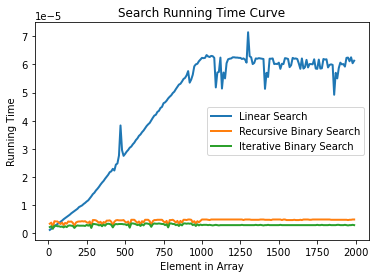

In [25]:
def plotLineSearch(fn, fnName, start, stop, step, array, arraySearch, tests):
    times=[]
    values=[]
    for x in range(start, stop, step):
        timesAverage = []
        for y in range(tests):
            start_time = time.clock()
            fn(array, arraySearch[x])
            time_elapsed = time.clock() - start_time
            timesAverage.append(time_elapsed)
        timesAverage = sorted(timesAverage)
        times.append(timesAverage[tests//2])
        values.append(x)
    plt.plot(values, times, lw=2, label=fnName)
    plt.legend()

plotLineSearch(linearSearch, 'Linear Search', 10, 2000, 10, factorialList, factorialListSearch, 100)
plotLineSearch(recursiveBinarySearch, 'Recursive Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)
plotLineSearch(iterativeBinarySearch, 'Iterative Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)

plt.title("Search Running Time Curve")
plt.xlabel("Element in Array")
plt.ylabel("Running Time")
plt.show()

I have also decided to isolate both binary searches in order to analyse them more closely, since the iterative approach is expanding the Y axis significantly when it reaches larger values. Notice the dips at 499, for example. This is because it is the middle point index in an array of 1,000 elements, so the algorithms happen to find the result straight away. There are also noticeable spikes on either side, indicating that the algorithm must take many loops to find elements that are just off of a mid-point.

It is also worth pointing out that the iterative binary search appears to be faster than the recursive binary search. This is a trend continuing from the factorial algorithms, where the iterative approach was also the quickest of the three.

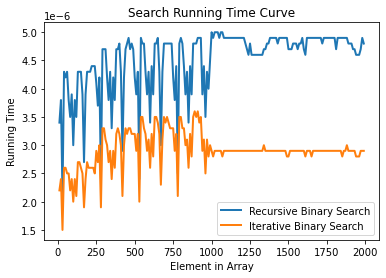

In [26]:
plotLineSearch(recursiveBinarySearch, 'Recursive Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)
plotLineSearch(iterativeBinarySearch, 'Iterative Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)

plt.title("Search Running Time Curve")
plt.xlabel("Element in Array")
plt.ylabel("Running Time")
plt.show()

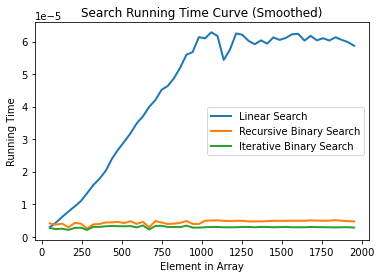

In [27]:
def plotSmoothSearch(fn, fnName, start, stop, step, array, arraySearch, tests):
    times=[]
    values=[]
    for x in range(start, stop, step):
        timesAverage = []
        for y in range(tests):
            start_time = time.clock()
            fn(array, arraySearch[x])
            time_elapsed = time.clock() - start_time
            timesAverage.append(time_elapsed)
        timesAverage = sorted(timesAverage)
        times.append(timesAverage[tests//2])
        values.append(x)
    model=make_interp_spline(values,times)
    xs=np.linspace(50,stop-50,50)
    ys=model(xs)
    plt.plot(xs, ys, lw=2, label=fnName)
    plt.legend()

plotSmoothSearch(linearSearch, 'Linear Search', 10, 2000, 10, factorialList, factorialListSearch, 100)
plotSmoothSearch(recursiveBinarySearch, 'Recursive Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)
plotSmoothSearch(iterativeBinarySearch, 'Iterative Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)

plt.title("Search Running Time Curve (Smoothed)")
plt.xlabel("Element in Array")
plt.ylabel("Running Time")
plt.show()

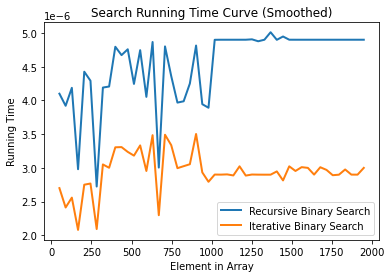

In [28]:
plotSmoothSearch(recursiveBinarySearch, 'Recursive Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)
plotSmoothSearch(iterativeBinarySearch, 'Iterative Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)

plt.title("Search Running Time Curve (Smoothed)")
plt.xlabel("Element in Array")
plt.ylabel("Running Time")
plt.show()

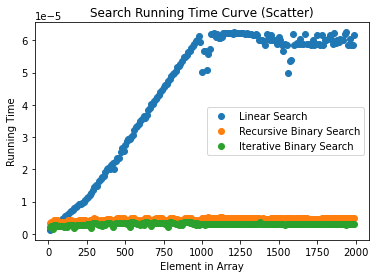

In [29]:
def plotScatterSearch(fn, fnName, start, stop, step, array, arraySearch, tests):
    times=[]
    values=[]
    for x in range(start, stop, step):
        timesAverage = []
        for y in range(tests):
            start_time = time.clock()
            fn(array, arraySearch[x])
            time_elapsed = time.clock() - start_time
            timesAverage.append(time_elapsed)
        timesAverage = sorted(timesAverage)
        times.append(timesAverage[tests//2])
        values.append(x)
    plt.plot(values, times, 'o', label=fnName)
    plt.legend()

plotScatterSearch(linearSearch, 'Linear Search', 10, 2000, 10, factorialList, factorialListSearch, 100)
plotScatterSearch(recursiveBinarySearch, 'Recursive Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)
plotScatterSearch(iterativeBinarySearch, 'Iterative Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)

plt.title("Search Running Time Curve (Scatter)")
plt.xlabel("Element in Array")
plt.ylabel("Running Time")
plt.show()

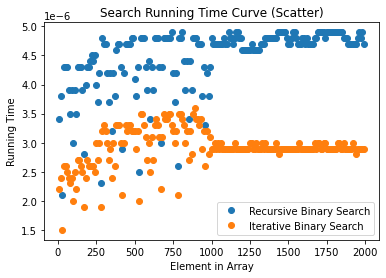

In [30]:
plotScatterSearch(recursiveBinarySearch, 'Recursive Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)
plotScatterSearch(iterativeBinarySearch, 'Iterative Binary Search', 10, 2000, 10, factorialList, factorialListSearch, 100)

plt.title("Search Running Time Curve (Scatter)")
plt.xlabel("Element in Array")
plt.ylabel("Running Time")
plt.show()

# 5. Use curve-fitting alogrithms to find the equation of the running times obtained from Tasks 2-4.

Reference: https://machinelearningmastery.com/curve-fitting-with-python/

The following cell is gathering the X and Y axes for our various factorial algorithms. This is in order to prepare our curve fitting algorithm.

In [31]:
def getAxisFactorial(fn, fnName, start, stop, step, tests):
    times=[]
    values=[]
    for x in range(start, stop, step):
        timesAverage = []
        for y in range(tests):
            start_time = time.clock()
            fn(x)
            time_elapsed = time.clock() - start_time
            timesAverage.append(time_elapsed)
        timesAverage = sorted(timesAverage)
        times.append(timesAverage[tests//2])
        values.append(x)
    return [values, times]


tailRecursionAxes = getAxisFactorial(factorialTailRecursion, 'Tail Recursion', 10, 1000, 10, 100)
tailRecursionX = tailRecursionAxes[0]
tailRecursionY = tailRecursionAxes[1]

nonTailRecursionAxes = getAxisFactorial(factorialNonTailRecursion, 'Non-Tail Recursion', 10, 1000, 10, 100)
nonTailRecursionX = nonTailRecursionAxes[0]
nonTailRecursionY = nonTailRecursionAxes[1]

iterativeAxes = getAxisFactorial(factorialIterative, 'Iterative', 10, 1000, 10, 100)
iterativeX = iterativeAxes[0]
iterativeY = iterativeAxes[1]

The next three cells illustrates the current running time complexity for each factorial algorithm (without a line of best fit).

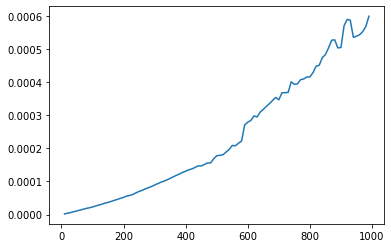

In [32]:
plt.plot(tailRecursionX, tailRecursionY)
plt.show()

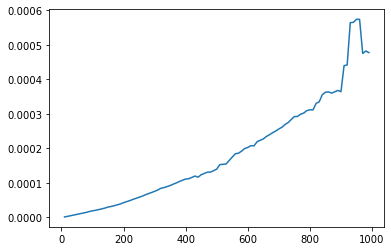

In [33]:
plt.plot(nonTailRecursionX, nonTailRecursionY)
plt.show()

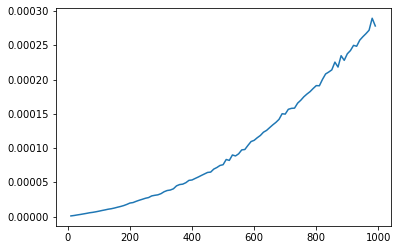

In [34]:
plt.plot(iterativeX, iterativeY)
plt.show()

Note that for the search algorithms, *n* now only goes up to the largest element in its array (i.e. index of 1000). It does not go beyond this, as we are trying to find a curve fitting algorithm, whereas before we went beyond in order to demonstrate worst case scenarioes.

The following cell is gathering the X and Y axes for our various search methods. This is in order to prepare our curve fitting algorithm.

In [35]:
def getAxisSearch(fn, fnName, start, stop, step, array, arraySearch, tests):
    times=[]
    values=[]
    for x in range(start, stop, step):
        timesAverage = []
        for y in range(tests):
            start_time = time.clock()
            fn(array, arraySearch[x])
            time_elapsed = time.clock() - start_time
            timesAverage.append(time_elapsed)
        timesAverage = sorted(timesAverage)
        times.append(timesAverage[tests//2])
        values.append(x)
    return [values,times]

linearAxes = getAxisSearch(linearSearch, 'Linear Search', 10, 1000, 10, factorialList, factorialListSearch, 100)
linearX = linearAxes[0]
linearY = linearAxes[1]

recursiveBinaryAxes = getAxisSearch(recursiveBinarySearch, 'Recursive Binary Search', 10, 1000, 10, factorialList, factorialListSearch, 100)
recursiveBinaryX = recursiveBinaryAxes[0]
recursiveBinaryY = recursiveBinaryAxes[1]

iterativeBinaryAxes = getAxisSearch(iterativeBinarySearch, 'Iterative Binary Search', 10, 1000, 10, factorialList, factorialListSearch, 100)
iterativeBinaryX = iterativeBinaryAxes[0]
iterativeBinaryY = iterativeBinaryAxes[1]

The next three cells illustrates the current running time complexity for each search algorithm (without a line of best fit).

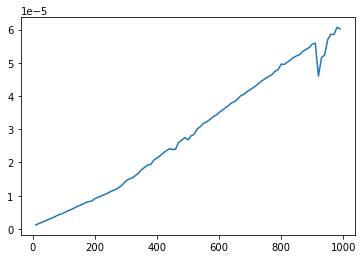

In [36]:
plt.plot(linearX, linearY)
plt.show()

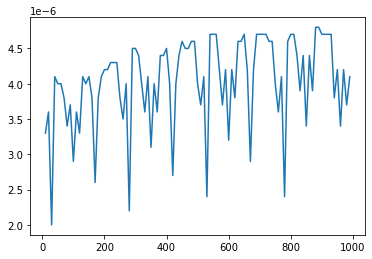

In [37]:
plt.plot(recursiveBinaryX, recursiveBinaryY)
plt.show()

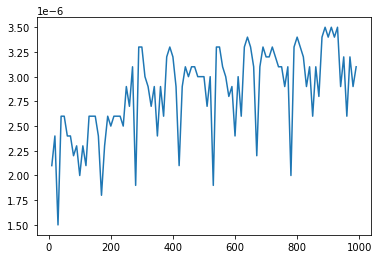

In [38]:
plt.plot(iterativeBinaryX, iterativeBinaryY)
plt.show()

The following cell is the curve-fitting algorithm. It plots a linear function for two given arrays (x and y values). The formula is a generic slope *(a)(x + b)*. It shows the general trend of the computational time increasing as *n* increases.

In [39]:
def linearFormula(x, a, b):
    return a * x + b

def linearCurveFit(x, y):
    popt, _ = curve_fit(linearFormula, x, y)
    a, b = popt
    print('y = %.5f * x + %.5f'%(a, b))
    x_line = np.arange(min(x), max(x), 1)
    y_line = linearFormula(x_line, a, b)
    plt.plot(x, y)
    plt.plot(x_line, y_line, '--', lw=5, color='red')
    plt.xlabel("Value(n)")
    plt.ylabel("Running Time")

Tail recursion for the factorial function. Despite its slightly curved appearance on this scale, this is a linear function and thus its best fit is plotted linearly. The curve can likely be attributed to the increasing complexity of multiplying larger and larger numbers together, which is strenuous on the CPU. However, in theory, the amount of function calls is directly proportional to the value of *n*. For each value of *n*, the function is called recursively the same amount of times. Thus, it is O(n) complexity.

y = 0.00000 * x + -0.00008


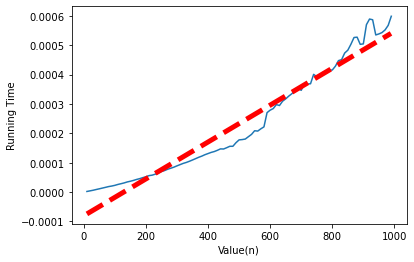

In [40]:
linearCurveFit(tailRecursionX, tailRecursionY)
plt.show()

Similarly to tail recursion, non-tail recursion is linear (*O(n)*) despite its slightly curved appearance on this scale.

y = 0.00000 * x + -0.00007


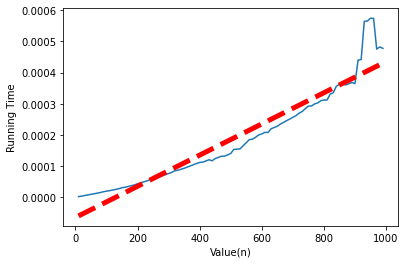

In [41]:
linearCurveFit(nonTailRecursionX, nonTailRecursionY)
plt.show()

The iterative approach is *O(n)* also, for similar reasons to the prior two algorithms. Each time *n* is increased, the algorithm loops one more time. Thus, it is linear in nature.

y = 0.00000 * x + -0.00004


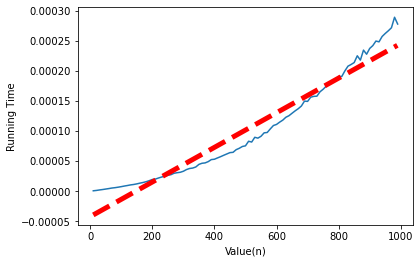

In [42]:
linearCurveFit(iterativeX, iterativeY)
plt.show()

Linear search is a prime example of *O(n)* complexity due to its consistency in running time. The reason for its *O(n)* classification has been explained in the previous section.

y = 0.00000 * x + -0.00000


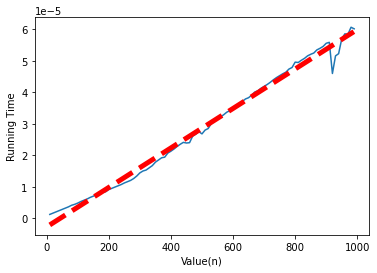

In [43]:
plt.show(linearCurveFit(linearX, linearY))

Recursive and iterative binary search algorithms both take a similar model in their running time. While their complexity is classified as O(log n), it is not as simple as the other algorithms to plot a best fit curve. Therefore, a spline was created (similar to the smoothing done in earlier cells) in order to simulate a suitable algorithm, in addition to a linear best fit.

y = 0.00000 * x + 0.00000


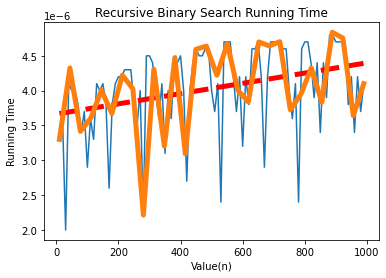

In [44]:
linearCurveFit(recursiveBinaryX, recursiveBinaryY)
model=make_interp_spline(recursiveBinaryX, recursiveBinaryY)
xs=np.linspace(10,990,30)
ys=model(xs)
plt.plot(xs, ys, lw=5)
plt.title("Recursive Binary Search Running Time")
plt.show()

y = 0.00000 * x + 0.00000


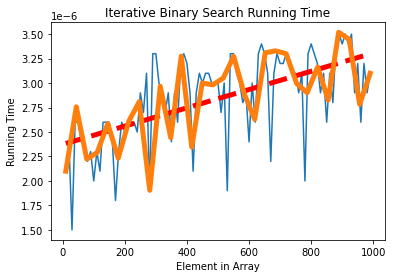

In [45]:
linearCurveFit(iterativeBinaryX, iterativeBinaryY)
model=make_interp_spline(iterativeBinaryX, iterativeBinaryY)
xs=np.linspace(10,990,30)
ys=model(xs)
plt.plot(xs, ys, lw=5)
plt.title("Iterative Binary Search Running Time")
plt.xlabel("Element in Array")
plt.ylabel("Running Time")
plt.show()